# Example for a simple neural network (Solution) - Remo ⚫️🍇

## Trump by maximum color (2 colors)

The inputs to the network are the number of cards of each color. The network should learn to select the color with the largest number of cards of that color.

For a simple example, let us assume that there are 5 cards in total for a player and only 2 colors.

### Libraries

We use the keras library for building, training and evaluating the network. A tutorial for keras can be found on (https://keras.io/) or https://www.tensorflow.org/guide/keras. There are different implementations of keras, here I will use the one build on tensorflow.


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

### Output function

We have to encode the output somehow, for two classes, the simplest solution is a single variable that should be 0 if there are more cards of color 0 and 1 if there are more cards of color 1.

### Training and label data.

So we can prepare some training data. In this simple case, all the possible configurations are actually known.


In [2]:
x_train = np.array([
    [0, 5],
    [1, 4],
    [2, 3],
    [3, 2],
    [4, 1],
    [5, 0],
], dtype=np.float32)
y_train = np.array([1, 1, 1, 0, 0, 0,], dtype=np.float32)
print(x_train)
print(y_train)

[[0. 5.]
 [1. 4.]
 [2. 3.]
 [3. 2.]
 [4. 1.]
 [5. 0.]]
[1. 1. 1. 0. 0. 0.]


### Normalisation

Input data can have different ranges. It is always a good idea (in other words absolutely essential) to normalize the input data. This is usually done into the range 0..1 or -1..1

In [3]:
x_train = x_train / 5.0
print(x_train)

[[0.  1. ]
 [0.2 0.8]
 [0.4 0.6]
 [0.6 0.4]
 [0.8 0.2]
 [1.  0. ]]


### A first network.

We will start with a very simple network, where we connect the inputs directly to the output. So there will be 2 variables, the weights for the connection and the bias. The output function is a sigmoid, which takes values between 0 and 1.

With keras, we first have to create the type of model we want (Sequential), and can then add layers. In the tensorflow implementation, we have to add the input_shape parameter in the first layer to tell it the format of the input. This does not include the batch dimension.

In [4]:
model = keras.Sequential()
model.add(keras.layers.Dense(1, activation='sigmoid', input_shape=[2]))

Next we have to compile the model and tell it what loss function and optimizer we want to have. We will take a mean squared error for loss function first. (This is actually not optimal and will be corrected in an exercise).

Besides the loss, we usually want to look at some metrics. Here we choose accuracy, that measures how often the network makes the correct decision (see last lecture).

In [5]:
# mse => mean square error
model.compile(loss='mse',
              optimizer='sgd',
              metrics=['accuracy'])

We can print some details about the model.

In [6]:
model.summary()
print(model.get_weights())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
[array([[ 1.0908161],
       [-0.7898633]], dtype=float32), array([0.], dtype=float32)]


We can either train one batch, or we can use fit to train repeatedly. The result from the training is the loss function and the metric.

In [7]:
model.train_on_batch(x_train, y_train)

[0.40782216, 0.0]

We can now try to fit the data in minibatches multiple times. This will calculate the weights, so as to minimize the loss. We might not always get a good result in the first try and even this very simple network seems to need a large number of training steps.

In [8]:
model.fit(x_train, y_train, epochs=100, batch_size=6)

Train on 6 samples
Epoch 1/100
6/6 [==============================] - 0s 24ms/sample - loss: 0.4077 - accuracy: 0.0000e+00
Epoch 2/100
6/6 [==============================] - 0s 256us/sample - loss: 0.4075 - accuracy: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 0s 259us/sample - loss: 0.4074 - accuracy: 0.0000e+00
Epoch 4/100
6/6 [==============================] - 0s 259us/sample - loss: 0.4072 - accuracy: 0.0000e+00
Epoch 5/100
6/6 [==============================] - 0s 228us/sample - loss: 0.4071 - accuracy: 0.0000e+00
Epoch 6/100
6/6 [==============================] - 0s 247us/sample - loss: 0.4069 - accuracy: 0.0000e+00
Epoch 7/100
6/6 [==============================] - 0s 288us/sample - loss: 0.4068 - accuracy: 0.0000e+00
Epoch 8/100
6/6 [==============================] - 0s 302us/sample - loss: 0.4066 - accuracy: 0.0000e+00
Epoch 9/100
6/6 [==============================] - 0s 274us/sample - loss: 0.4065 - accuracy: 0.0000e+00
Epoch 10/100
6/6 [===================

Epoch 79/100
6/6 [==============================] - 0s 256us/sample - loss: 0.3960 - accuracy: 0.0000e+00
Epoch 80/100
6/6 [==============================] - 0s 249us/sample - loss: 0.3958 - accuracy: 0.0000e+00
Epoch 81/100
6/6 [==============================] - 0s 253us/sample - loss: 0.3957 - accuracy: 0.0000e+00
Epoch 82/100
6/6 [==============================] - 0s 216us/sample - loss: 0.3955 - accuracy: 0.0000e+00
Epoch 83/100
6/6 [==============================] - 0s 245us/sample - loss: 0.3954 - accuracy: 0.0000e+00
Epoch 84/100
6/6 [==============================] - 0s 214us/sample - loss: 0.3952 - accuracy: 0.0000e+00
Epoch 85/100
6/6 [==============================] - 0s 232us/sample - loss: 0.3951 - accuracy: 0.0000e+00
Epoch 86/100
6/6 [==============================] - 0s 252us/sample - loss: 0.3949 - accuracy: 0.0000e+00
Epoch 87/100
6/6 [==============================] - 0s 262us/sample - loss: 0.3948 - accuracy: 0.0000e+00
Epoch 88/100
6/6 [============================

We can predict the values from the training value. Why are the results floating point number and not 0 or 1? Does the result seem likely?

In [9]:
model.predict(x_train)

array([[0.3297577 ],
       [0.40900135],
       [0.49327302],
       [0.5779287 ],
       [0.65824026],
       [0.730399  ]], dtype=float32)

We can also print the found weights for each layer:

In [10]:
for layer in model.layers:
    weights = layer.get_weights()
    print(layer.name)
    print(weights)

dense
[array([[ 1.0011766],
       [-0.7047525]], dtype=float32), array([-0.00452868], dtype=float32)]


How do we find the actual predictions? We use a threshold on the output of the sigmoid function.

In [11]:
model.predict(x_train) > 0.5

array([[False],
       [False],
       [False],
       [ True],
       [ True],
       [ True]])

### A larger network

Lets try a more complicated network with two hidden layers.

In [12]:
model = keras.Sequential()
model.add(keras.layers.Dense(2, activation='relu', input_shape=[2])) # nachher eher mehr!
model.add(keras.layers.Dense(2, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid')) # hier immer 1 damit man am Schluss nur ein Wert hat
model.compile(loss='mse',
              optimizer='sgd',
              metrics=['accuracy'])

And train it again...

In [13]:
model.fit(x_train, y_train, epochs=2000, batch_size=6)

Train on 6 samples
Epoch 1/2000
6/6 [==============================] - 0s 51ms/sample - loss: 0.2516 - accuracy: 0.1667
Epoch 2/2000
6/6 [==============================] - 0s 249us/sample - loss: 0.2516 - accuracy: 0.1667
Epoch 3/2000
6/6 [==============================] - 0s 236us/sample - loss: 0.2516 - accuracy: 0.1667
Epoch 4/2000
6/6 [==============================] - 0s 212us/sample - loss: 0.2516 - accuracy: 0.1667
Epoch 5/2000
6/6 [==============================] - 0s 217us/sample - loss: 0.2516 - accuracy: 0.1667
Epoch 6/2000
6/6 [==============================] - 0s 271us/sample - loss: 0.2515 - accuracy: 0.1667
Epoch 7/2000
6/6 [==============================] - 0s 307us/sample - loss: 0.2515 - accuracy: 0.1667
Epoch 8/2000
6/6 [==============================] - 0s 322us/sample - loss: 0.2515 - accuracy: 0.1667
Epoch 9/2000
6/6 [==============================] - 0s 299us/sample - loss: 0.2515 - accuracy: 0.1667
Epoch 10/2000
6/6 [==============================] - 0s 238us/sa

Epoch 81/2000
6/6 [==============================] - 0s 259us/sample - loss: 0.2508 - accuracy: 0.3333
Epoch 82/2000
6/6 [==============================] - 0s 237us/sample - loss: 0.2508 - accuracy: 0.3333
Epoch 83/2000
6/6 [==============================] - 0s 246us/sample - loss: 0.2508 - accuracy: 0.3333
Epoch 84/2000
6/6 [==============================] - 0s 270us/sample - loss: 0.2508 - accuracy: 0.3333
Epoch 85/2000
6/6 [==============================] - 0s 289us/sample - loss: 0.2508 - accuracy: 0.3333
Epoch 86/2000
6/6 [==============================] - 0s 285us/sample - loss: 0.2508 - accuracy: 0.3333
Epoch 87/2000
6/6 [==============================] - 0s 276us/sample - loss: 0.2508 - accuracy: 0.3333
Epoch 88/2000
6/6 [==============================] - 0s 291us/sample - loss: 0.2508 - accuracy: 0.3333
Epoch 89/2000
6/6 [==============================] - 0s 277us/sample - loss: 0.2508 - accuracy: 0.3333
Epoch 90/2000
6/6 [==============================] - 0s 274us/sample - lo

Epoch 160/2000
6/6 [==============================] - 0s 319us/sample - loss: 0.2505 - accuracy: 0.3333
Epoch 161/2000
6/6 [==============================] - 0s 326us/sample - loss: 0.2505 - accuracy: 0.3333
Epoch 162/2000
6/6 [==============================] - 0s 408us/sample - loss: 0.2505 - accuracy: 0.3333
Epoch 163/2000
6/6 [==============================] - 0s 407us/sample - loss: 0.2505 - accuracy: 0.3333
Epoch 164/2000
6/6 [==============================] - 0s 389us/sample - loss: 0.2505 - accuracy: 0.3333
Epoch 165/2000
6/6 [==============================] - 0s 538us/sample - loss: 0.2505 - accuracy: 0.3333
Epoch 166/2000
6/6 [==============================] - 0s 469us/sample - loss: 0.2505 - accuracy: 0.3333
Epoch 167/2000
6/6 [==============================] - 0s 673us/sample - loss: 0.2505 - accuracy: 0.3333
Epoch 168/2000
6/6 [==============================] - 0s 292us/sample - loss: 0.2505 - accuracy: 0.3333
Epoch 169/2000
6/6 [==============================] - 0s 290us/s

Epoch 239/2000
6/6 [==============================] - 0s 353us/sample - loss: 0.2503 - accuracy: 0.3333
Epoch 240/2000
6/6 [==============================] - 0s 433us/sample - loss: 0.2503 - accuracy: 0.3333
Epoch 241/2000
6/6 [==============================] - 0s 352us/sample - loss: 0.2503 - accuracy: 0.3333
Epoch 242/2000
6/6 [==============================] - 0s 373us/sample - loss: 0.2503 - accuracy: 0.3333
Epoch 243/2000
6/6 [==============================] - 0s 541us/sample - loss: 0.2503 - accuracy: 0.3333
Epoch 244/2000
6/6 [==============================] - 0s 374us/sample - loss: 0.2503 - accuracy: 0.3333
Epoch 245/2000
6/6 [==============================] - 0s 435us/sample - loss: 0.2503 - accuracy: 0.3333
Epoch 246/2000
6/6 [==============================] - 0s 313us/sample - loss: 0.2503 - accuracy: 0.3333
Epoch 247/2000
6/6 [==============================] - 0s 245us/sample - loss: 0.2503 - accuracy: 0.3333
Epoch 248/2000
6/6 [==============================] - 0s 262us/s

Epoch 318/2000
6/6 [==============================] - 0s 315us/sample - loss: 0.2501 - accuracy: 0.3333
Epoch 319/2000
6/6 [==============================] - 0s 261us/sample - loss: 0.2501 - accuracy: 0.3333
Epoch 320/2000
6/6 [==============================] - 0s 236us/sample - loss: 0.2501 - accuracy: 0.3333
Epoch 321/2000
6/6 [==============================] - 0s 249us/sample - loss: 0.2501 - accuracy: 0.3333
Epoch 322/2000
6/6 [==============================] - 0s 264us/sample - loss: 0.2501 - accuracy: 0.3333
Epoch 323/2000
6/6 [==============================] - 0s 283us/sample - loss: 0.2500 - accuracy: 0.3333
Epoch 324/2000
6/6 [==============================] - 0s 247us/sample - loss: 0.2500 - accuracy: 0.3333
Epoch 325/2000
6/6 [==============================] - 0s 257us/sample - loss: 0.2500 - accuracy: 0.3333
Epoch 326/2000
6/6 [==============================] - 0s 281us/sample - loss: 0.2500 - accuracy: 0.3333
Epoch 327/2000
6/6 [==============================] - 0s 288us/s

Epoch 397/2000
6/6 [==============================] - 0s 264us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 398/2000
6/6 [==============================] - 0s 281us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 399/2000
6/6 [==============================] - 0s 258us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 400/2000
6/6 [==============================] - 0s 235us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 401/2000
6/6 [==============================] - 0s 300us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 402/2000
6/6 [==============================] - 0s 250us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 403/2000
6/6 [==============================] - 0s 246us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 404/2000
6/6 [==============================] - 0s 255us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 405/2000
6/6 [==============================] - 0s 243us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 406/2000
6/6 [==============================] - 0s 257us/s

Epoch 476/2000
6/6 [==============================] - 0s 272us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 477/2000
6/6 [==============================] - 0s 341us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 478/2000
6/6 [==============================] - 0s 483us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 479/2000
6/6 [==============================] - 0s 528us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 480/2000
6/6 [==============================] - 0s 403us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 481/2000
6/6 [==============================] - 0s 369us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 482/2000
6/6 [==============================] - 0s 457us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 483/2000
6/6 [==============================] - 0s 419us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 484/2000
6/6 [==============================] - 0s 426us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 485/2000
6/6 [==============================] - 0s 413us/s

Epoch 555/2000
6/6 [==============================] - 0s 245us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 556/2000
6/6 [==============================] - 0s 354us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 557/2000
6/6 [==============================] - 0s 268us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 558/2000
6/6 [==============================] - 0s 266us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 559/2000
6/6 [==============================] - 0s 251us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 560/2000
6/6 [==============================] - 0s 277us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 561/2000
6/6 [==============================] - 0s 263us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 562/2000
6/6 [==============================] - 0s 237us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 563/2000
6/6 [==============================] - 0s 261us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 564/2000
6/6 [==============================] - 0s 347us/s

Epoch 634/2000
6/6 [==============================] - 0s 293us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 635/2000
6/6 [==============================] - 0s 283us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 636/2000
6/6 [==============================] - 0s 281us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 637/2000
6/6 [==============================] - 0s 306us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 638/2000
6/6 [==============================] - 0s 260us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 639/2000
6/6 [==============================] - 0s 241us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 640/2000
6/6 [==============================] - 0s 239us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 641/2000
6/6 [==============================] - 0s 322us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 642/2000
6/6 [==============================] - 0s 272us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 643/2000
6/6 [==============================] - 0s 309us/s

Epoch 713/2000
6/6 [==============================] - 0s 391us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 714/2000
6/6 [==============================] - 0s 448us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 715/2000
6/6 [==============================] - 0s 787us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 716/2000
6/6 [==============================] - 0s 696us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 717/2000
6/6 [==============================] - 0s 854us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 718/2000
6/6 [==============================] - 0s 331us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 719/2000
6/6 [==============================] - 0s 552us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 720/2000
6/6 [==============================] - 0s 430us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 721/2000
6/6 [==============================] - 0s 736us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 722/2000
6/6 [==============================] - 0s 819us/s

Epoch 792/2000
6/6 [==============================] - 0s 274us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 793/2000
6/6 [==============================] - 0s 305us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 794/2000
6/6 [==============================] - 0s 232us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 795/2000
6/6 [==============================] - 0s 259us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 796/2000
6/6 [==============================] - 0s 302us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 797/2000
6/6 [==============================] - 0s 323us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 798/2000
6/6 [==============================] - 0s 303us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 799/2000
6/6 [==============================] - 0s 479us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 800/2000
6/6 [==============================] - 0s 331us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 801/2000
6/6 [==============================] - 0s 382us/s

Epoch 871/2000
6/6 [==============================] - 0s 276us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 872/2000
6/6 [==============================] - 0s 388us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 873/2000
6/6 [==============================] - 0s 453us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 874/2000
6/6 [==============================] - 0s 244us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 875/2000
6/6 [==============================] - 0s 281us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 876/2000
6/6 [==============================] - 0s 317us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 877/2000
6/6 [==============================] - 0s 265us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 878/2000
6/6 [==============================] - 0s 253us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 879/2000
6/6 [==============================] - 0s 237us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 880/2000
6/6 [==============================] - 0s 284us/s

Epoch 950/2000
6/6 [==============================] - 0s 341us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 951/2000
6/6 [==============================] - 0s 495us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 952/2000
6/6 [==============================] - 0s 367us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 953/2000
6/6 [==============================] - 0s 289us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 954/2000
6/6 [==============================] - 0s 451us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 955/2000
6/6 [==============================] - 0s 252us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 956/2000
6/6 [==============================] - 0s 246us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 957/2000
6/6 [==============================] - 0s 312us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 958/2000
6/6 [==============================] - 0s 260us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 959/2000
6/6 [==============================] - 0s 295us/s

Epoch 1029/2000
6/6 [==============================] - 0s 301us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1030/2000
6/6 [==============================] - 0s 267us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1031/2000
6/6 [==============================] - 0s 254us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1032/2000
6/6 [==============================] - 0s 288us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1033/2000
6/6 [==============================] - 0s 288us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1034/2000
6/6 [==============================] - 0s 259us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1035/2000
6/6 [==============================] - 0s 266us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1036/2000
6/6 [==============================] - 0s 306us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1037/2000
6/6 [==============================] - 0s 230us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1038/2000
6/6 [==============================] - 

6/6 [==============================] - 0s 270us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1108/2000
6/6 [==============================] - 0s 268us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1109/2000
6/6 [==============================] - 0s 261us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1110/2000
6/6 [==============================] - 0s 257us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1111/2000
6/6 [==============================] - 0s 229us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1112/2000
6/6 [==============================] - 0s 361us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1113/2000
6/6 [==============================] - 0s 254us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1114/2000
6/6 [==============================] - 0s 245us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1115/2000
6/6 [==============================] - 0s 233us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1116/2000
6/6 [==============================] - 0s 335us/sample 

Epoch 1186/2000
6/6 [==============================] - 0s 257us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1187/2000
6/6 [==============================] - 0s 290us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1188/2000
6/6 [==============================] - 0s 269us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1189/2000
6/6 [==============================] - 0s 267us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1190/2000
6/6 [==============================] - 0s 297us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1191/2000
6/6 [==============================] - 0s 296us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1192/2000
6/6 [==============================] - 0s 266us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1193/2000
6/6 [==============================] - 0s 248us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1194/2000
6/6 [==============================] - 0s 288us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1195/2000
6/6 [==============================] - 

6/6 [==============================] - 0s 318us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1265/2000
6/6 [==============================] - 0s 374us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1266/2000
6/6 [==============================] - 0s 381us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1267/2000
6/6 [==============================] - 0s 410us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1268/2000
6/6 [==============================] - 0s 343us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1269/2000
6/6 [==============================] - 0s 333us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1270/2000
6/6 [==============================] - 0s 371us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1271/2000
6/6 [==============================] - 0s 289us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1272/2000
6/6 [==============================] - 0s 319us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1273/2000
6/6 [==============================] - 0s 283us/sample 

Epoch 1343/2000
6/6 [==============================] - 0s 278us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1344/2000
6/6 [==============================] - 0s 270us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1345/2000
6/6 [==============================] - 0s 335us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1346/2000
6/6 [==============================] - 0s 280us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1347/2000
6/6 [==============================] - 0s 274us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1348/2000
6/6 [==============================] - 0s 238us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1349/2000
6/6 [==============================] - 0s 325us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1350/2000
6/6 [==============================] - 0s 273us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1351/2000
6/6 [==============================] - 0s 249us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1352/2000
6/6 [==============================] - 

6/6 [==============================] - 0s 241us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1422/2000
6/6 [==============================] - 0s 255us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1423/2000
6/6 [==============================] - 0s 263us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1424/2000
6/6 [==============================] - 0s 251us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1425/2000
6/6 [==============================] - 0s 233us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1426/2000
6/6 [==============================] - 0s 260us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1427/2000
6/6 [==============================] - 0s 226us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1428/2000
6/6 [==============================] - 0s 249us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1429/2000
6/6 [==============================] - 0s 246us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1430/2000
6/6 [==============================] - 0s 276us/sample 

Epoch 1500/2000
6/6 [==============================] - 0s 253us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1501/2000
6/6 [==============================] - 0s 302us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1502/2000
6/6 [==============================] - 0s 268us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1503/2000
6/6 [==============================] - 0s 261us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1504/2000
6/6 [==============================] - 0s 265us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1505/2000
6/6 [==============================] - 0s 280us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1506/2000
6/6 [==============================] - 0s 273us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1507/2000
6/6 [==============================] - 0s 245us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1508/2000
6/6 [==============================] - 0s 250us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1509/2000
6/6 [==============================] - 

Epoch 1579/2000
6/6 [==============================] - 0s 291us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1580/2000
6/6 [==============================] - 0s 245us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1581/2000
6/6 [==============================] - 0s 244us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1582/2000
6/6 [==============================] - 0s 294us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1583/2000
6/6 [==============================] - 0s 261us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1584/2000
6/6 [==============================] - 0s 258us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1585/2000
6/6 [==============================] - 0s 256us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1586/2000
6/6 [==============================] - 0s 262us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1587/2000
6/6 [==============================] - 0s 250us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1588/2000
6/6 [==============================] - 

Epoch 1658/2000
6/6 [==============================] - 0s 295us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1659/2000
6/6 [==============================] - 0s 283us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1660/2000
6/6 [==============================] - 0s 261us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1661/2000
6/6 [==============================] - 0s 264us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1662/2000
6/6 [==============================] - 0s 272us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1663/2000
6/6 [==============================] - 0s 240us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1664/2000
6/6 [==============================] - 0s 236us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1665/2000
6/6 [==============================] - 0s 276us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1666/2000
6/6 [==============================] - 0s 309us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1667/2000
6/6 [==============================] - 

6/6 [==============================] - 0s 278us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1737/2000
6/6 [==============================] - 0s 313us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1738/2000
6/6 [==============================] - 0s 268us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1739/2000
6/6 [==============================] - 0s 264us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1740/2000
6/6 [==============================] - 0s 250us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1741/2000
6/6 [==============================] - 0s 282us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1742/2000
6/6 [==============================] - 0s 270us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1743/2000
6/6 [==============================] - 0s 249us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1744/2000
6/6 [==============================] - 0s 248us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1745/2000
6/6 [==============================] - 0s 321us/sample 

Epoch 1815/2000
6/6 [==============================] - 0s 280us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1816/2000
6/6 [==============================] - 0s 262us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1817/2000
6/6 [==============================] - 0s 245us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1818/2000
6/6 [==============================] - 0s 242us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1819/2000
6/6 [==============================] - 0s 257us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1820/2000
6/6 [==============================] - 0s 289us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1821/2000
6/6 [==============================] - 0s 275us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1822/2000
6/6 [==============================] - 0s 258us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1823/2000
6/6 [==============================] - 0s 246us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1824/2000
6/6 [==============================] - 

6/6 [==============================] - 0s 254us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1894/2000
6/6 [==============================] - 0s 251us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1895/2000
6/6 [==============================] - 0s 301us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1896/2000
6/6 [==============================] - 0s 275us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1897/2000
6/6 [==============================] - 0s 265us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1898/2000
6/6 [==============================] - 0s 316us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1899/2000
6/6 [==============================] - 0s 337us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1900/2000
6/6 [==============================] - 0s 305us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1901/2000
6/6 [==============================] - 0s 275us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1902/2000
6/6 [==============================] - 0s 285us/sample 

Epoch 1972/2000
6/6 [==============================] - 0s 247us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1973/2000
6/6 [==============================] - 0s 256us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1974/2000
6/6 [==============================] - 0s 245us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1975/2000
6/6 [==============================] - 0s 248us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1976/2000
6/6 [==============================] - 0s 233us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1977/2000
6/6 [==============================] - 0s 273us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1978/2000
6/6 [==============================] - 0s 244us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1979/2000
6/6 [==============================] - 0s 253us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1980/2000
6/6 [==============================] - 0s 248us/sample - loss: 0.2500 - accuracy: 0.5000
Epoch 1981/2000
6/6 [==============================] - 

The results are not necessarly better, how does the prediction look now?

In [14]:
model.predict(x_train)

array([[0.4999776],
       [0.4999776],
       [0.4999776],
       [0.4999776],
       [0.4999776],
       [0.4999776]], dtype=float32)

In [15]:
for layer in model.layers:
    weights = layer.get_weights()
    print(layer)
    print(weights)

[array([[ 0.653225  ,  0.22316039],
       [-0.7121184 , -0.9281886 ]], dtype=float32), array([-0.01209837,  0.        ], dtype=float32)]
[array([[ 0.17543426, -0.08319485],
       [-1.037873  , -0.622829  ]], dtype=float32), array([-0.06465299,  0.        ], dtype=float32)]
[array([[ 0.3809994],
       [-1.0256368]], dtype=float32), array([-8.9790294e-05], dtype=float32)]


The larger network, does not seem to work better as the simpler one. Or is it maybe not large enough?

The problem is not the network, but the data, we just do not have enough data. So lets try to make up some more data artificially.


In [16]:
x_new = np.random.random(size=(10000,2))
y_new = np.zeros(10000, dtype=np.float32)
condition = (x_new[:,1] > x_new[:,0])
y_new[condition] = 1.0

In [17]:
model.fit(x_new, y_new, epochs=100, batch_size=100)

Train on 10000 samples
Epoch 1/100
10000/10000 [==============================] - 0s 23us/sample - loss: 0.2500 - accuracy: 0.4931
Epoch 2/100
10000/10000 [==============================] - 0s 6us/sample - loss: 0.2500 - accuracy: 0.4934
Epoch 3/100
10000/10000 [==============================] - 0s 7us/sample - loss: 0.2500 - accuracy: 0.4986
Epoch 4/100
10000/10000 [==============================] - 0s 7us/sample - loss: 0.2500 - accuracy: 0.4989
Epoch 5/100
10000/10000 [==============================] - 0s 9us/sample - loss: 0.2500 - accuracy: 0.5014
Epoch 6/100
10000/10000 [==============================] - 0s 7us/sample - loss: 0.2500 - accuracy: 0.5019
Epoch 7/100
10000/10000 [==============================] - 0s 9us/sample - loss: 0.2500 - accuracy: 0.5019
Epoch 8/100
10000/10000 [==============================] - 0s 8us/sample - loss: 0.2500 - accuracy: 0.5020
Epoch 9/100
10000/10000 [==============================] - 0s 7us/sample - loss: 0.2500 - accuracy: 0.5020
Epoch 10/100


That seems better. Lets look how it performs on our original data.

In [18]:
model.predict(x_train)

array([[0.4979855],
       [0.4979855],
       [0.4979855],
       [0.4979855],
       [0.4979855],
       [0.4979855]], dtype=float32)

In [19]:
model.predict(x_train) > 0.5

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False]])

### Evaluation

We might want to check how the network performs on any data. For this, keras provides the evaluate function that will 
evaluate the loss and the metrics. So of course label (y) data is needed for that. 

In [20]:
model.evaluate(x_new, y_new)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.24999600429534913, 0.502]

Of course, we would normally do that on validation or test data not used during training.

In [21]:
x_val_new = np.random.random(size=(5000,2))
y_val_new = np.zeros(5000, dtype=np.float32)
y_val_new[x_val_new[:,1] > x_val_new[:,0]] = 1.0
model.evaluate(x_val_new, y_val_new)

5000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.24998230290412904, 0.5054]

### Visualisation

It is essential to visualise the training process to see what is going on. In Keras, an easy method to do this is to use the history object that is returned from fit. It contains the metrics and the loss.

We will also split our data into training and validation for this test. We rebuild the model, so that it is initialized again. Otherwise we would just continue with the weights from the previous fit.

In [22]:
model = keras.Sequential()
model.add(keras.layers.Dense(2, activation='relu', input_shape=[2]))
model.add(keras.layers.Dense(2, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='mse',
              optimizer='sgd',
              metrics=['accuracy'])
history = model.fit(x_new, y_new, validation_split=0.25, epochs=50, batch_size=100)

Train on 7500 samples, validate on 2500 samples
Epoch 1/50
7500/7500 [==============================] - 0s 47us/sample - loss: 0.2955 - accuracy: 0.2028 - val_loss: 0.2840 - val_accuracy: 0.1300
Epoch 2/50
7500/7500 [==============================] - 0s 12us/sample - loss: 0.2725 - accuracy: 0.1384 - val_loss: 0.2630 - val_accuracy: 0.1864
Epoch 3/50
7500/7500 [==============================] - 0s 13us/sample - loss: 0.2574 - accuracy: 0.2631 - val_loss: 0.2539 - val_accuracy: 0.3560
Epoch 4/50
7500/7500 [==============================] - 0s 14us/sample - loss: 0.2524 - accuracy: 0.3837 - val_loss: 0.2515 - val_accuracy: 0.4216
Epoch 5/50
7500/7500 [==============================] - 0s 15us/sample - loss: 0.2510 - accuracy: 0.4301 - val_loss: 0.2507 - val_accuracy: 0.4560
Epoch 6/50
7500/7500 [==============================] - 0s 12us/sample - loss: 0.2505 - accuracy: 0.4555 - val_loss: 0.2503 - val_accuracy: 0.4744
Epoch 7/50
7500/7500 [==============================] - 0s 13us/sample

In [23]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Val'], loc='upper left')

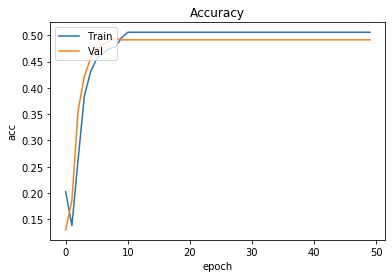

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Train', 'Val'], loc='upper left')

## Exercise: Correct loss function

The loss function used above (mse) is not optimal. A better loss function would be the crossentropy. Change the network to use that loss function.

Notizen Remo: binary crossentropy

In [26]:
model = keras.Sequential()
model.add(keras.layers.Dense(2, activation='relu', input_shape=[2]))
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
x = np.random.random(size=(5000,2))
y = np.zeros(5000, dtype=np.float32)
y[x[:,1] > x[:,0]] = 1.0
history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=100, shuffle=True)

Train on 3750 samples, validate on 1250 samples
Epoch 1/50
3750/3750 [==============================] - 1s 154us/sample - loss: 0.6832 - accuracy: 0.5120 - val_loss: 0.6906 - val_accuracy: 0.4808
Epoch 2/50
3750/3750 [==============================] - 0s 24us/sample - loss: 0.6760 - accuracy: 0.5227 - val_loss: 0.6829 - val_accuracy: 0.5000
Epoch 3/50
3750/3750 [==============================] - 0s 24us/sample - loss: 0.6706 - accuracy: 0.5379 - val_loss: 0.6766 - val_accuracy: 0.5200
Epoch 4/50
3750/3750 [==============================] - 0s 22us/sample - loss: 0.6659 - accuracy: 0.5683 - val_loss: 0.6713 - val_accuracy: 0.5584
Epoch 5/50
3750/3750 [==============================] - 0s 22us/sample - loss: 0.6614 - accuracy: 0.5979 - val_loss: 0.6661 - val_accuracy: 0.5888
Epoch 6/50
3750/3750 [==============================] - 0s 21us/sample - loss: 0.6570 - accuracy: 0.6285 - val_loss: 0.6613 - val_accuracy: 0.6128
Epoch 7/50
3750/3750 [==============================] - 0s 23us/sampl

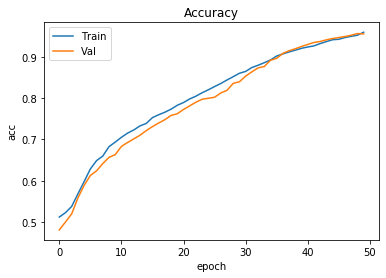

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Train', 'Val'], loc='upper left')

## Exercise: Maximum of 4 colors

Implement a network that will receive 4 colors and has to select one of them.

This will require a change of the labels (y) that now take values of 0, 1, 2 or 3. However, networks do not use labels in that form directly for multi class classification, but use 1-hot encoded or categorical data instead.

In keras there is a function `keras.utils.to_categorical` that can be used for that.

The last layer in the network should then no longer be sigmoid, but the softmax function. And we need the multiclass form of the crossentropy function, which in keras is called `categorical_crossentropy`.


In [28]:
x_train= np.random.random(size=(5000,4))
y_train_label = keras.utils.to_categorical(np.argmax(x_train, axis=1))

model = keras.Sequential()
model.add(keras.layers.Dense(4, activation='relu', input_shape=[4]))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
history = model.fit(x_train, y_train_label, validation_split=0.25, epochs=50, batch_size=100, shuffle=True)

Train on 3750 samples, validate on 1250 samples
Epoch 1/50
3750/3750 [==============================] - 1s 204us/sample - loss: 1.3830 - accuracy: 0.2736 - val_loss: 1.3800 - val_accuracy: 0.3592
Epoch 2/50
3750/3750 [==============================] - 0s 40us/sample - loss: 1.3775 - accuracy: 0.3669 - val_loss: 1.3753 - val_accuracy: 0.3224
Epoch 3/50
3750/3750 [==============================] - 0s 39us/sample - loss: 1.3731 - accuracy: 0.3259 - val_loss: 1.3708 - val_accuracy: 0.3616
Epoch 4/50
3750/3750 [==============================] - 0s 36us/sample - loss: 1.3685 - accuracy: 0.3595 - val_loss: 1.3657 - val_accuracy: 0.3792
Epoch 5/50
3750/3750 [==============================] - 0s 39us/sample - loss: 1.3634 - accuracy: 0.3941 - val_loss: 1.3605 - val_accuracy: 0.3928
Epoch 6/50
3750/3750 [==============================] - 0s 39us/sample - loss: 1.3582 - accuracy: 0.4125 - val_loss: 1.3548 - val_accuracy: 0.4272
Epoch 7/50
3750/3750 [==============================] - 0s 35us/sampl

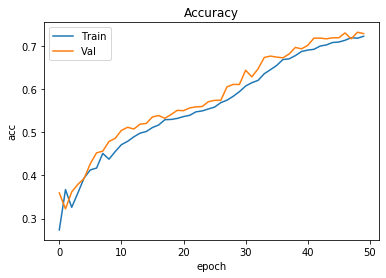

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Train', 'Val'], loc='upper left')

## Exercise: Implement a ML Network to learn trump from features

We would like to train a network to get the trump from some features. (We could use the cards directly, but this is deep learning and we will see more of that in next lesson :-) )

As features we can use the number of cards of a color as before and some of the features from last lecture. For keras all input features should be floating point numbers. Also we need numpy arrays and not pandas. To get the array from a panda, the property `values` can be used.

In [30]:
import pandas as pd
import keras
import matplotlib.pyplot as plt
from pathlib import Path
# path_to_data = Path('data')
# Import only a fraction of data for efficient testing
# data = pd.read_csv(path_to_data / '2018_10_18_trump.csv', header=None, nrows=1000)
data = pd.read_csv('2018_10_18_trump.csv', header=None, nrows=1000)
cards = [
# Diamonds
'DA','DK','DQ','DJ','D10','D9','D8','D7','D6',
# Hearts
'HA','HK','HQ','HJ','H10','H9','H8','H7','H6',
# Spades
'SA','SK','SQ','SJ','S10','S9','S8','S7','S6',
# Clubs
'CA','CK','CQ','CJ','C10','C9','C8','C7','C6'
]

# Forehand (yes = 1, no = 0)
forehand = ['FH']

user  = ['user']
trump = ['trump']

data.columns = cards + forehand + user + trump
data.drop('user', axis='columns', inplace=True)
data.head()

Using TensorFlow backend.


,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CK,CQ,CJ,C10,C9,C8,C7,C6,FH,trump
0,0,0,0,1,1,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,6
1,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,1,0,0,5
2,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,6
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,5
4,0,1,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,4


Continue as follows:
- Calculate features, 
- add them to the data set
- drop the columns not used
- convert to numpy array
- build a network and train

In [31]:
# add data column with NrD, NrH, NrS, NrC, NrA, Nr6
data.insert(loc=len(data.columns), column='NrD', value=data.iloc[:,0:9].sum(axis=1) / 9.0)
data.insert(loc=len(data.columns), column='NrH', value=data.iloc[:,9:18].sum(axis=1) / 9.0)
data.insert(loc=len(data.columns), column='NrS', value=data.iloc[:,18:27].sum(axis=1) / 9.0)
data.insert(loc=len(data.columns), column='NrC', value=data.iloc[:,27:36].sum(axis=1) / 9.0)

data.insert(loc=len(data.columns), column='NrA', value=data.iloc[:,0:36:9].sum(axis=1) / 4.0)
data.insert(loc=len(data.columns), column='Nr6', value=data.iloc[:,8:36:9].sum(axis=1) / 4.0)

In [32]:
data.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,C7,C6,FH,trump,NrD,NrH,NrS,NrC,NrA,Nr6
0,0,0,0,1,1,0,1,1,0,0,...,0,0,0,6,0.444444,0.000000,0.333333,0.222222,0.25,0.00
1,0,0,0,0,0,0,0,0,1,1,...,1,0,0,5,0.111111,0.444444,0.222222,0.222222,0.25,0.50
2,1,0,0,1,0,0,0,0,0,0,...,1,1,0,6,0.222222,0.222222,0.222222,0.333333,0.50,0.25
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,5,0.000000,0.333333,0.333333,0.333333,0.50,0.50
4,0,1,0,0,0,0,0,0,1,1,...,0,0,1,4,0.222222,0.555556,0.111111,0.111111,0.25,0.50


In [33]:
x = data.filter(items=['DJ', 'D9', 'HJ', 'H9', 'SJ', 'S9', 'CJ', 'C9', 'NrD', 'NrH', 'NrS', 'NrC', 'NrA', 'Nr6','FH']) 
x.head()

,DJ,D9,HJ,H9,SJ,S9,CJ,C9,NrD,NrH,NrS,NrC,NrA,Nr6,FH
0,1,0,0,0,1,0,0,0,0.444444,0.000000,0.333333,0.222222,0.25,0.00,0
1,0,0,0,1,0,0,1,0,0.111111,0.444444,0.222222,0.222222,0.25,0.50,0
2,1,0,1,0,0,0,0,0,0.222222,0.222222,0.222222,0.333333,0.50,0.25,0
3,0,0,0,0,0,0,0,1,0.000000,0.333333,0.333333,0.333333,0.50,0.50,0
4,0,0,0,0,0,0,1,0,0.222222,0.555556,0.111111,0.111111,0.25,0.50,1


In [34]:
y_label = data['trump']
y = keras.utils.to_categorical(y_label, num_classes=7)

model = keras.Sequential()
model.add(keras.layers.Dense(15, activation='relu', input_shape=[15]))
model.add(keras.layers.Dense(62, activation='relu'))
model.add(keras.layers.Dense(62, activation='relu'))
model.add(keras.layers.Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=100, shuffle=True)

Train on 750 samples, validate on 250 samples
Epoch 1/50
750/750 [==============================] - 0s 128us/step - loss: 1.9521 - accuracy: 0.0840 - val_loss: 1.9350 - val_accuracy: 0.1720
Epoch 2/50
750/750 [==============================] - 0s 15us/step - loss: 1.9337 - accuracy: 0.1653 - val_loss: 1.9168 - val_accuracy: 0.2880
Epoch 3/50
750/750 [==============================] - 0s 14us/step - loss: 1.9163 - accuracy: 0.3133 - val_loss: 1.9004 - val_accuracy: 0.3480
Epoch 4/50
750/750 [==============================] - 0s 15us/step - loss: 1.9007 - accuracy: 0.3693 - val_loss: 1.8846 - val_accuracy: 0.3760
Epoch 5/50
750/750 [==============================] - 0s 15us/step - loss: 1.8857 - accuracy: 0.3800 - val_loss: 1.8707 - val_accuracy: 0.3800
Epoch 6/50
750/750 [==============================] - 0s 15us/step - loss: 1.8724 - accuracy: 0.3773 - val_loss: 1.8581 - val_accuracy: 0.3800
Epoch 7/50
750/750 [==============================] - 0s 16us/step - loss: 1.8604 - accuracy: 0

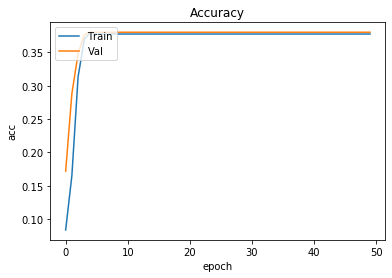

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Train', 'Val'], loc='upper left')